In [13]:
import zipfile
import os

out_dir = 'dataset'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

def unzip_data(filename):
    with zipfile.ZipFile(filename, 'r') as zf:
        zf.extractall(out_dir)

filename = ['train_features.csv.zip', 'train_targets_scored.csv.zip']

for f in filename:
    unzip_data(f)

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
X_train_raw = pd.read_csv(out_dir + '/train_features.csv')
y_train_raw = pd.read_csv(out_dir + '/train_targets_scored.csv')

In [16]:
X_train = X_train_raw.iloc[:10000]
y_train = y_train_raw.iloc[:10000]

In [17]:
X_train.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [18]:
y_train.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<BarContainer object of 206 artists>

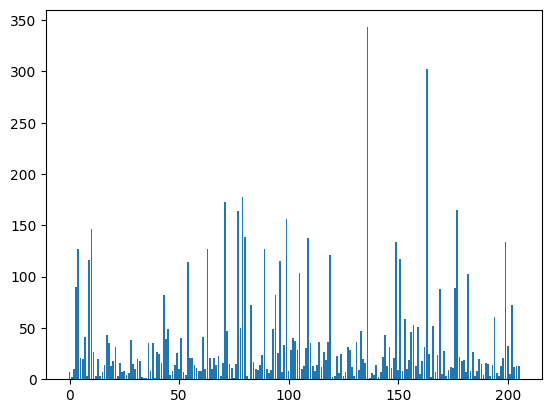

In [8]:
label_counts = y_train.drop('sig_id', axis=1).sum(axis=0)
plt.bar(np.arange(0, len(label_counts.index), 1), label_counts.values)

In [19]:
g_df_train = X_train.filter(regex='^g-')
c_df_train = X_train.filter(regex='^c-')

print(g_df_train.shape)
print(c_df_train.shape)

(10000, 772)
(10000, 100)


<AxesSubplot: xlabel='g-123', ylabel='Density'>

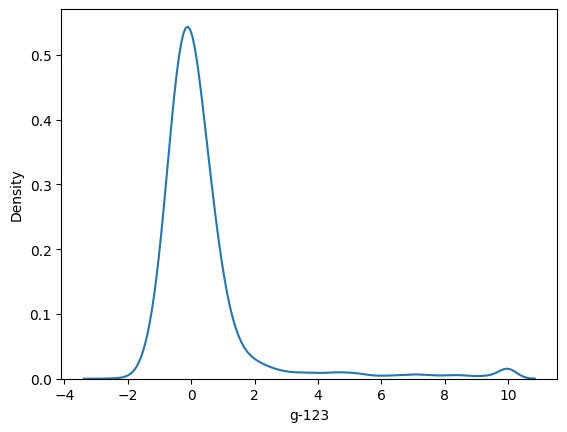

In [10]:
sns.kdeplot(g_df_train['g-123'])


In [11]:
corr_matrix_g = g_df_train.corr()


In [ ]:
fig = plt.figure(figsize=(36,36), dpi = 500)
sns.heatmap(corr_matrix_g, fmt = '.2f')


In [39]:
count_greater_than_05 = 0
count_less_than_minus05 = 0
for i in range(len(corr_matrix_g)):
    for j in range(i+1, len(corr_matrix_g)):
        if corr_matrix_g.iloc[i, j] > 0.5:
            count_greater_than_05 += 1
        elif corr_matrix_g.iloc[i, j] < -0.5:
            count_less_than_minus05 += 1

print("Number of correlations greater than 0.5:", count_greater_than_05)
print("Number of correlations less than -0.5:", count_less_than_minus05)

Number of correlations greater than 0.5: 6806
Number of correlations less than -0.5: 6159


In [63]:
# Exclude diagonal elements
upper = corr_matrix_g.where(np.triu(np.ones(corr_matrix_g.shape), k=1).astype(np.bool_))

threshold = 0.5
high_corr = np.where((upper > threshold) | (upper < -threshold))
cols = g_df_train.columns
for i in range(len(high_corr[0])):
    row = high_corr[0][i]
    col = high_corr[1][i]
    print(f"{cols[row]} and {cols[col]} have correlation {upper.iloc[row, col]}")


g-0 and g-8 have correlation -0.593161106593732
g-0 and g-10 have correlation -0.5470585625139777
g-0 and g-16 have correlation -0.5060961035548573
g-0 and g-30 have correlation -0.5232799115776678
g-0 and g-31 have correlation 0.5426527720141757
g-0 and g-37 have correlation -0.5941552830679661
g-0 and g-38 have correlation 0.6096780227257588
g-0 and g-41 have correlation -0.5081916427224042
g-0 and g-46 have correlation 0.5335735006993516
g-0 and g-50 have correlation -0.5607045350945677
g-0 and g-62 have correlation -0.605700109453557
g-0 and g-63 have correlation -0.5888459284513985
g-0 and g-67 have correlation -0.573171102012785
g-0 and g-72 have correlation -0.6170647200860412
g-0 and g-75 have correlation -0.5843003663163611
g-0 and g-86 have correlation 0.5747198339393293
g-0 and g-91 have correlation 0.5176150303262238
g-0 and g-95 have correlation 0.5343280355253592
g-0 and g-96 have correlation -0.5409266418718152
g-0 and g-97 have correlation 0.6365999960871225
g-0 and g-9

In [20]:
# g_df_train = g_df_train.iloc[:1000,:]
# y_train = y_train.iloc[:1000,:]

y_train_new = y_train.drop('sig_id', axis=1)
y_numpy_array = y_train_new.to_numpy()


In [21]:
def create_int_labels(encoded_labels):

    return np.argmax(encoded_labels, axis=1)

y_int_array = create_int_labels(y_numpy_array) + 1
y_int_array

array([102,   1,  49, ..., 183,   1,   1])

In [22]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MultiLabelBinarizer


tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(g_df_train)



/tmp/ipykernel_1501/1603256174.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, cmap='viridis')


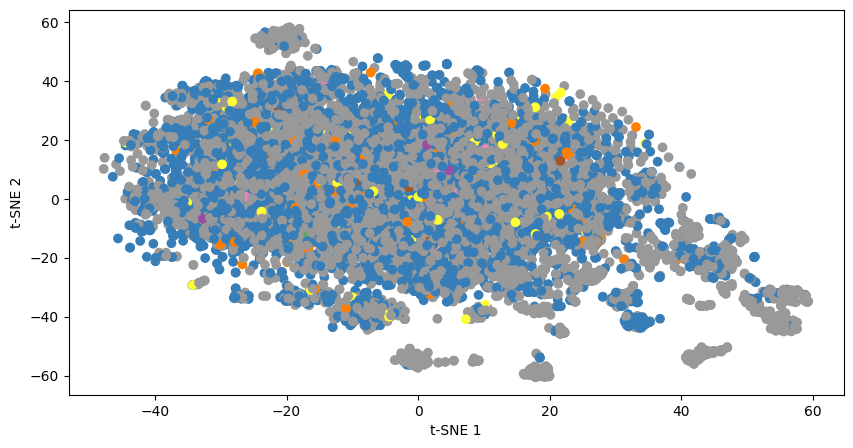

In [34]:

cmap = plt.cm.get_cmap('Set1')
colors = cmap(y_int_array)


fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, cmap='viridis')
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
# plt.colorbar(ax.get_children()[2], ax=ax)
plt.show()


In [23]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

g_df_train_scaled = pd.DataFrame(data=scalar.fit_transform(g_df_train.values), columns=g_df_train.columns)

In [75]:
from sklearn.decomposition import  PCA

n = 600
pca_cols = [f'PC{i}' for i in range(1,n+1,1)]
pca = PCA(n_components=n)
pca_g = pca.fit_transform(g_df_train_scaled)
# pca_g_df =  pd.DataFrame(data=pca_g, columns=pca_cols)


Component 1: 0.222
Component 2: 0.043
Component 3: 0.037
Component 4: 0.033
Component 5: 0.023
Component 6: 0.023
Component 7: 0.019
Component 8: 0.017
Component 9: 0.014
Component 10: 0.013
Component 11: 0.011
Component 12: 0.010
Component 13: 0.009
Component 14: 0.009
Component 15: 0.008
Component 16: 0.007
Component 17: 0.007
Component 18: 0.007
Component 19: 0.006
Component 20: 0.006
Component 21: 0.005
Component 22: 0.005
Component 23: 0.004
Component 24: 0.004
Component 25: 0.004
Component 26: 0.004
Component 27: 0.004
Component 28: 0.004
Component 29: 0.003
Component 30: 0.003
Component 31: 0.003
Component 32: 0.003
Component 33: 0.003
Component 34: 0.003
Component 35: 0.003
Component 36: 0.003
Component 37: 0.003
Component 38: 0.003
Component 39: 0.003
Component 40: 0.003
Component 41: 0.002
Component 42: 0.002
Component 43: 0.002
Component 44: 0.002
Component 45: 0.002
Component 46: 0.002
Component 47: 0.002
Component 48: 0.002
Component 49: 0.002
Component 50: 0.002
Component

<BarContainer object of 600 artists>

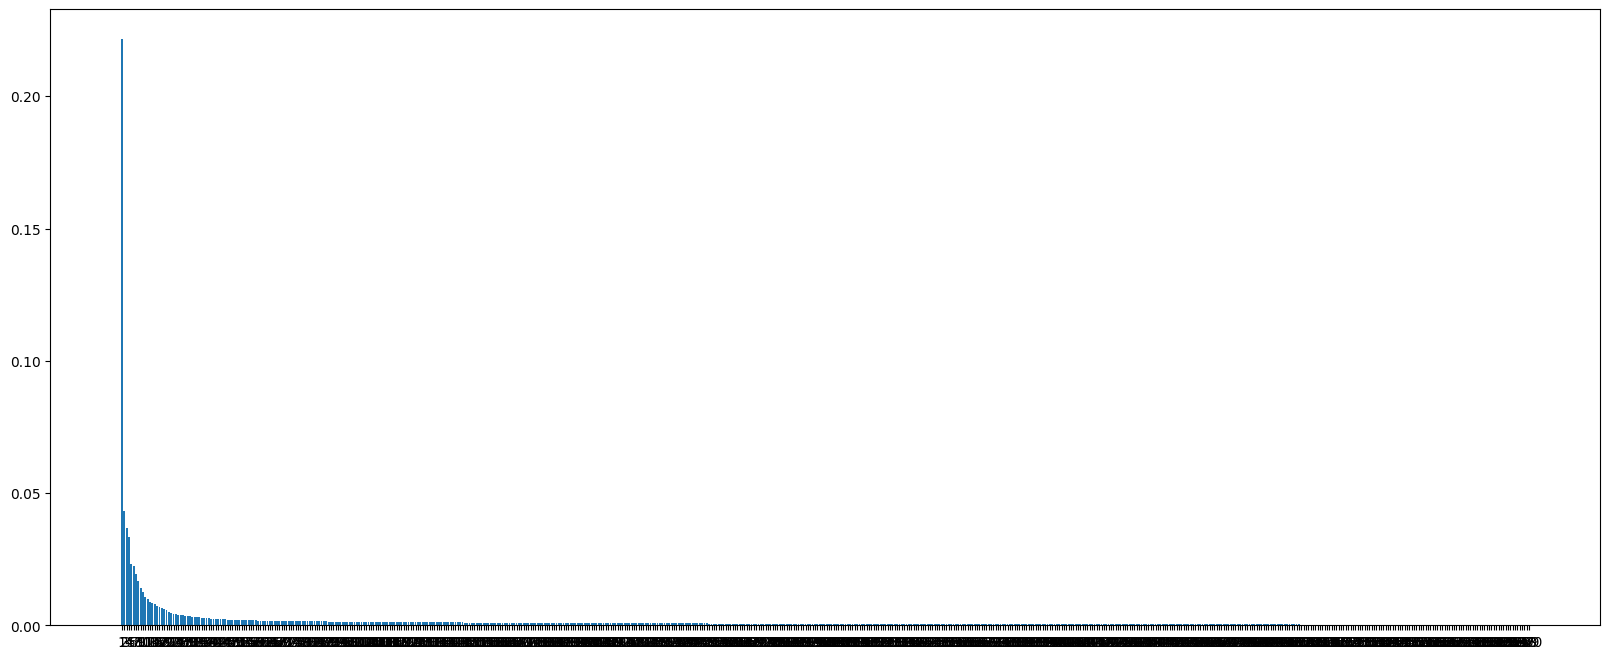

In [80]:
# Get explained variance ratio for each component
explained_variance_ratio = pca.fit(g_df_train_scaled).explained_variance_ratio_
# Print importance of each component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Component {i+1}: {ratio:.3f}")
labels = [str(i) for i in range(1,n+1,1)]

fig, ax  = plt.subplots(figsize=(20, 8))
ax.bar(labels, explained_variance_ratio)


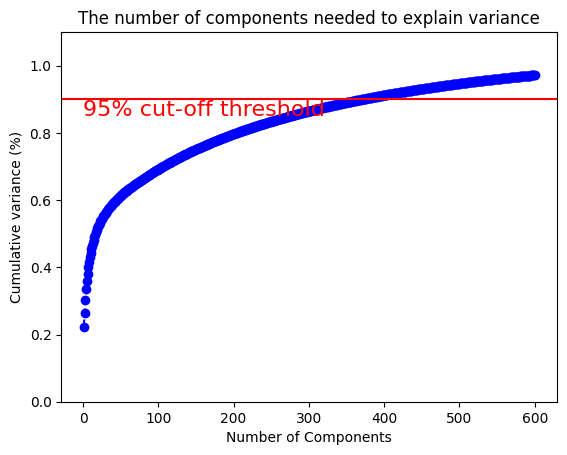

In [82]:
fig, ax = plt.subplots()
xi = np.arange(1, n+1, step=1)
y = np.cumsum(pca.fit(g_df_train_scaled).explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
# plt.xticks(np.arange(0, 21, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

# ax.grid(axis='x')
plt.show()


In [84]:
xi[y>0.9]

array([371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383,
       384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396,
       397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409,
       410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422,
       423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435,
       436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448,
       449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461,
       462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474,
       475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487,
       488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500,
       501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513,
       514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526,
       527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539,
       540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 55

772


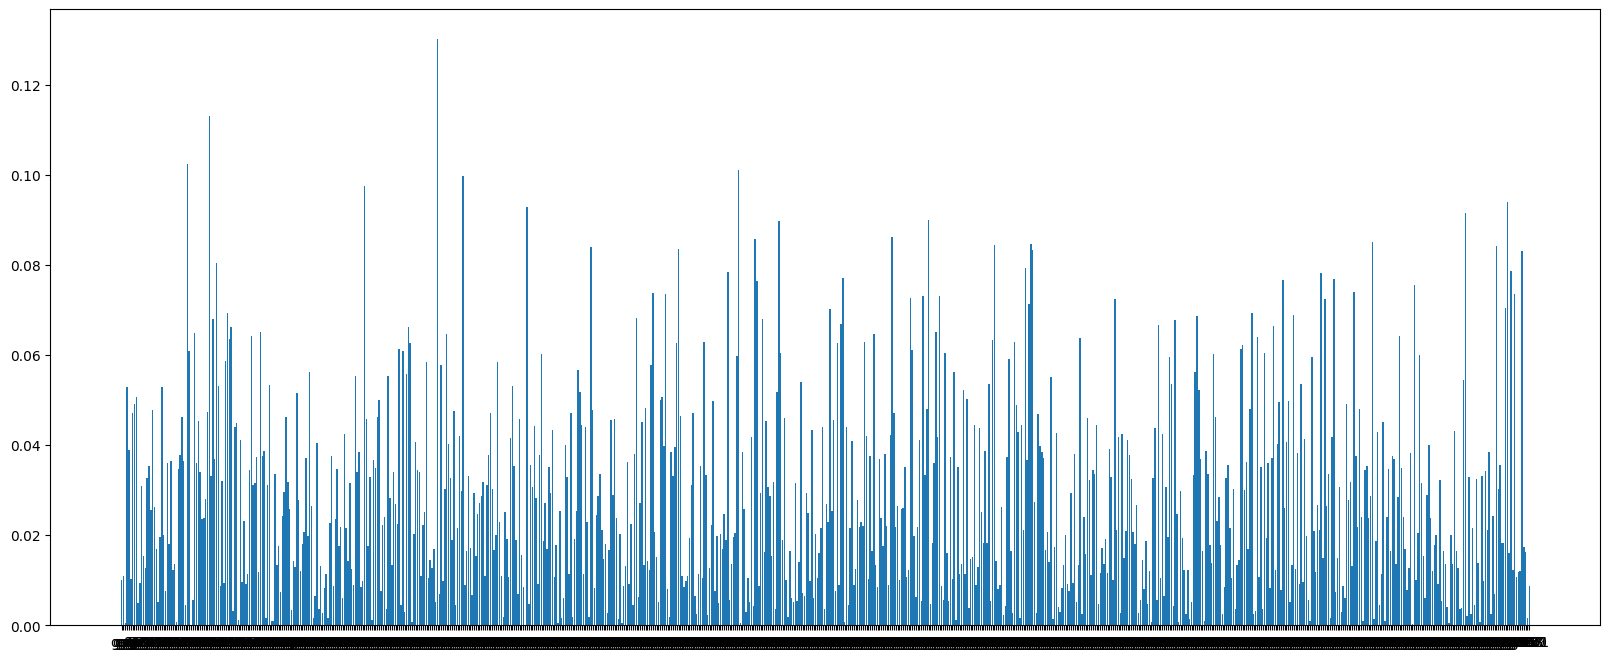

In [26]:
# importance = np.abs(pca.components_)

# idx_max = np.argmax(importance, axis=1)

# features = g_df_train.columns
# features_max = features[idx_max]

# for i in range(len(features_max)):
#     print("Feature %d: %s - Importance in PCs: %.3f" % (i+1, features[i], np.sum(importance[:, i])))

# for i in range(len(features_max)):
#     print("PC %d: %s" % (i+1, features_max[i]))

pc1_comp = np.abs(pca.components_[1])
labels = g_df_train.columns

fig, ax  = plt.subplots(figsize=(20, 8))
ax.bar(labels, pc1_comp)


print(len(pc1_comp < 0.001))

Text(0.5, 1.0, 'PCA Scatter Plot - genes')

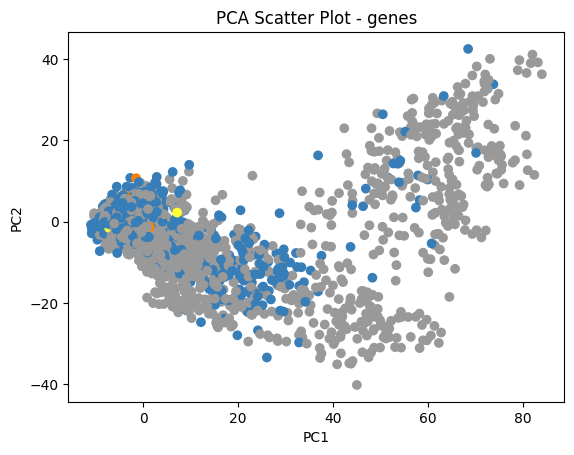

In [81]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


plt.scatter(pca_g_df['PC1'], pca_g_df['PC2'], c=colors)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot - genes')


CLUSTERING

In [88]:
gene_data = g_df_train_scaled.transpose()
gene_data.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
g-0,0.607848,-0.116771,0.289447,-0.548227,-0.410009,-0.619610,1.328286,0.027610,-0.392401,-0.217501,...,4.371439,-0.073193,0.114326,-0.320577,-0.831267,-0.026166,0.261569,0.078598,0.494354,0.471317
g-1,0.809023,0.626721,0.838388,-0.178101,-0.363829,0.486507,2.206634,0.754700,0.805108,0.440381,...,0.185770,1.389332,-0.523007,-0.837937,0.178429,0.395112,0.118966,-1.041039,1.212903,-1.025868
g-2,-0.388566,0.142217,1.359914,-0.405741,0.793228,-1.108763,-1.641390,-0.276781,-0.397979,-0.660265,...,0.686780,2.804771,0.445744,-0.003530,0.490283,1.081423,-0.801258,0.142411,0.289226,-0.050204
g-3,-0.745194,-0.025568,-0.170084,0.469255,0.641556,0.151170,6.189929,2.652010,-0.236216,-0.357809,...,0.025774,-0.006341,-1.422565,0.882840,-0.173465,0.356008,-0.527574,-0.416017,0.049860,-0.586944
g-4,-0.244185,0.951762,-0.084417,3.950994,1.345023,1.209994,-2.188413,0.635379,-0.691951,-0.070520,...,-0.013650,0.198652,-0.344225,-1.446244,1.959062,-0.914405,0.210874,0.026761,1.758982,-0.137739


/home/ruskin/miniconda3/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


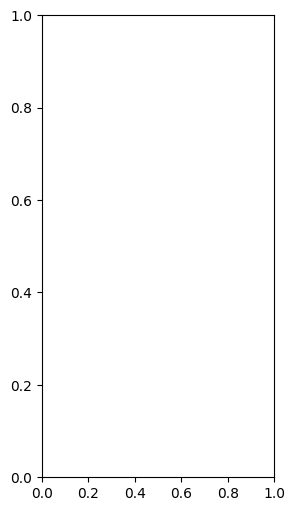

In [93]:
from bioinfokit import analys, visuz

visuz.gene_exp.hmap(df=gene_data, dim=(3, 6), tickfont=(6, 4))

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(gene_data, 'ward')
#plotting the dendrogram
plt.figure(figsize=(100, 15))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()
